<a href="https://colab.research.google.com/github/Preethana-c/AD_detection/blob/main/ad_binaryprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!nvidia-smi

Sun Feb 23 17:21:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 108.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninst

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size
IMAGE_SIZE = [224, 224]

# Define dataset path
dataset_path = '/content/drive/MyDrive/newslices'

# Select two classes you want to classify (Change these names as per your dataset)
class_1 = "AD"  # Replace with actual folder name
class_2 = "CN"  # Replace with actual folder name

# Create an ImageDataGenerator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training data for only the selected two classes
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='binary',  # Binary classification
    subset='training',
    classes=[class_1, class_2]  # Only include two classes
)

# Load validation data for the selected two classes
valid_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='binary',  # Binary classification
    subset='validation',
    classes=[class_1, class_2]  # Only include two classes
)

Found 267 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


In [ ]:
# Load pre-trained InceptionV3
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# Freeze pre-trained layers
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# Add custom layers
x = Flatten()(inception.output)
prediction = Dense(1, activation='sigmoid')(x)  # Change to 1 neuron, sigmoid activation


In [ ]:
# Create the model
model = Model(inputs=inception.input, outputs=prediction)


In [ ]:
model.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7ce92125f150>>

In [ ]:
model.compile(
    loss='binary_crossentropy',  # Change loss function
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
r = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(valid_generator)
)

Epoch 1/10
9/9 [==============================] - 79s 8s/step - loss: 4.7850 - accuracy: 0.4157 - val_loss: 4.4024 - val_accuracy: 0.5909
Epoch 2/10
9/9 [==============================] - 27s 3s/step - loss: 2.4978 - accuracy: 0.5094 - val_loss: 1.9915 - val_accuracy: 0.6061
Epoch 3/10
9/9 [==============================] - 31s 4s/step - loss: 1.1597 - accuracy: 0.6742 - val_loss: 1.5448 - val_accuracy: 0.6667
Epoch 4/10
9/9 [==============================] - 27s 3s/step - loss: 0.9254 - accuracy: 0.6816 - val_loss: 1.0840 - val_accuracy: 0.6667
Epoch 5/10
9/9 [==============================] - 31s 4s/step - loss: 0.5251 - accuracy: 0.7678 - val_loss: 1.2681 - val_accuracy: 0.6061
Epoch 6/10
9/9 [==============================] - 27s 3s/step - loss: 0.5052 - accuracy: 0.7715 - val_loss: 0.6196 - val_accuracy: 0.6970
Epoch 7/10
9/9 [==============================] - 31s 4s/step - loss: 0.3465 - accuracy: 0.8202 - val_loss: 0.7568 - val_accuracy: 0.6515
Epoch 8/10
9/9 [==================

In [ ]:

import matplotlib.pyplot as plt

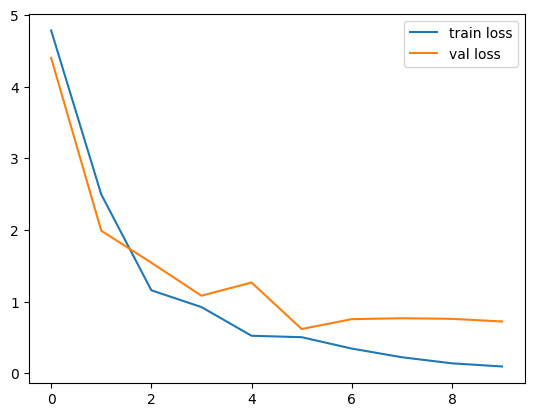

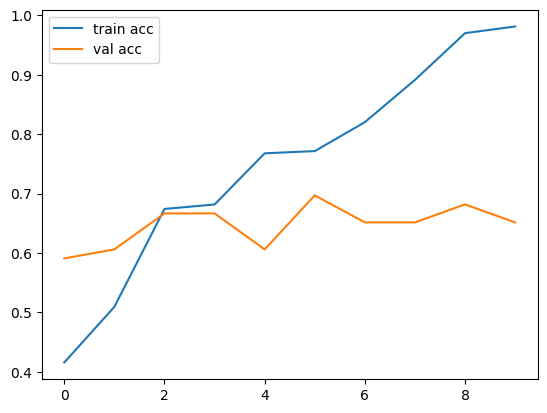

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(valid_generator)


3/3 [==============================] - 6s 2s/step


In [ ]:
y_pred

array([[0.53845584],
       [0.77381074],
       [0.07550921],
       [0.45027697],
       [0.09171755],
       [0.756249  ],
       [0.08564558],
       [0.05420979],
       [0.6327186 ],
       [0.0508343 ],
       [0.9219903 ],
       [0.40738526],
       [0.98429006],
       [0.30680373],
       [0.2804086 ],
       [0.24983874],
       [0.2952418 ],
       [0.7474841 ],
       [0.98240227],
       [0.04707857],
       [0.6972887 ],
       [0.18125029],
       [0.17322472],
       [0.9094933 ],
       [0.63431734],
       [0.9402305 ],
       [0.42512953],
       [0.10017715],
       [0.27468318],
       [0.5487975 ],
       [0.26480556],
       [0.7021461 ],
       [0.47729456],
       [0.8673806 ],
       [0.19158685],
       [0.7912519 ],
       [0.59253263],
       [0.13546042],
       [0.28920168],
       [0.09970036],
       [0.10132422],
       [0.74296135],
       [0.5865322 ],
       [0.24124785],
       [0.8737759 ],
       [0.23515756],
       [0.43237275],
       [0.013

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_inception.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:
# Load the image
img_path = "/content/drive/MyDrive/newslices/AD/005_S_0814.png"  # Change 'sample.jpg' to your image file
img = image.load_img(img_path, target_size=(224, 224))

In [ ]:
# Convert image to array
x = image.img_to_array(img)

In [ ]:
# Normalize pixel values
x = x / 255.0

In [ ]:
# Expand dimensions to match model input shape
x = np.expand_dims(x, axis=0)

In [ ]:
# Preprocess the image (if using InceptionV3)
img_data = preprocess_input(x)

In [ ]:
# Predict class probabilities
predictions = model.predict(img_data)

ValueError: in user code:

    File "/usr/local/lib/python3.11/dist-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.11/dist-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.11/dist-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.11/dist-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.11/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.11/dist-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 1, 224, 224, 3)


In [ ]:
print("Shape of img_data:", img_data.shape)


Shape of img_data: (1, 1, 224, 224, 3)


In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np

# Load image
img_path = "/content/drive/MyDrive/newslices/AD/005_S_0814.png"  # Update with actual path
img = image.load_img(img_path, target_size=(224, 224))

# Convert to array
x = image.img_to_array(img)

# Expand dimensions (Ensure batch dimension is added only once)
x = np.expand_dims(x, axis=0)  # Correct way

# Preprocess input for InceptionV3
img_data = preprocess_input(x)

# Verify the shape
print("Processed image shape:", img_data.shape)  # Should be (1, 224, 224, 3)

# Make prediction
predictions = model.predict(img_data)

# Print results
print("Predictions:", predictions)


Processed image shape: (1, 224, 224, 3)
1/1 [==============================] - 1s 1s/step
Predictions: [[0.09283333]]


In [ ]:
# Define class labels
class_labels = ["AD", "CN"]  # Class 0 -> AD, Class 1 -> CN

# Get the predicted class (0 or 1)
predicted_class = int(predictions[0][0] > 0.5)  # Threshold at 0.5

# Print the result
print(f"Predicted Class: {class_labels[predicted_class]}")


Predicted Class: AD
